**Deep Learning AA 2023/2024**
** **
Teachers:\
Fabrizio Silvestri (fsilvestri@diag.uniroma1.it)\
Antonio Purificato (antonio.purificato@uniroma1.it)\
Farooq Wani (wani@diag.uniroma1.it)\
Maria Sofia Bucarelli (bucarelli.diag@uniroma1.it) \


Reference: https://atcold.github.io/pytorch-Deep-Learning/en/week01/01-3/

### Linear Transformation

We generate some points in 2-D space

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from matplotlib.pyplot import plot, title, axis
from torch.distributions.exp_family import ExponentialFamily
from torch.distributions.exponential import Exponential
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Fixing random state for reproducibility
rng = np.random.RandomState(1)

In [2]:
n_points = 1000


def distribution(dist):
    if dist ==0:
      X = torch.randn(n_points, 2).to(device)
      center = torch.tensor([0.,0.])
    elif dist ==1:
      m = Exponential(torch.ones(n_points,2))
      X = m.sample()
      X = X-torch.mean(X,0)
      center = torch.tensor([0.,0.])
    elif dist == 2:
      X = torch.rand(int(n_points/2), 2).to(device)
      Y = torch.rand(int(n_points/2), 2).to(device) + 1
      X = torch.cat((X,Y), dim = 0)
      X = X-torch.mean(X,0)
      center = torch.tensor([0.,0.])
    return (X,center)

X, center = distribution (2)

lenght = min(torch.max(X[:,1])- torch.min(X[:,1]), torch.max(X[:,0])- torch.min(X[:,0]))/4

L = torch.tensor([[0,lenght],[lenght,0]])



tensor(0.)


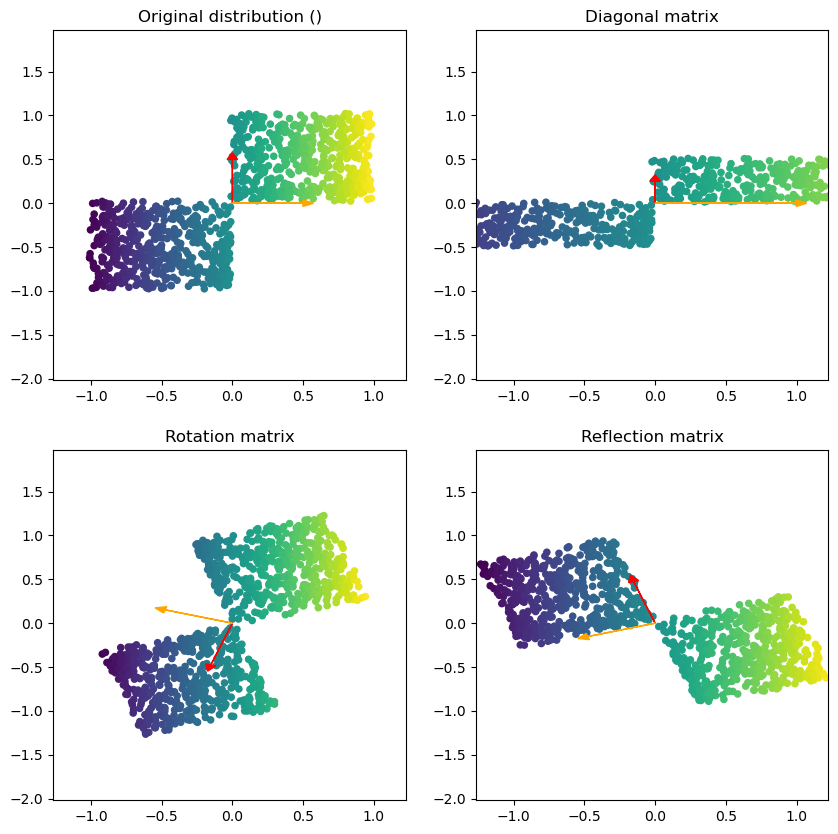

In [3]:
#from torch.serialization import load
#@title Linear transformations in $R^2$
colorsX = X[:, 0]
sz = 20

#Multiplying by a diagonal matrix
D = torch.tensor([[2,0],[0,0.5]]) #diagonl matrix
Z = (D@X.T).T #transformation

#All the rest here is just for the plot
colorsZ = Z[:, 0]
LD = L@D
centerD = D@center


#Multiplying by a rotation matrix
theta = 60
S = torch.tensor([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) #rotation matrix
S = S.to(torch.float)
Y = (S@X.T).T #transformation

# For the plot
colorsY = Y[:, 0]
LS = L@S
centerS = S@center

#Multiplying by a reflection matrix
theta = 60
R = torch.tensor([[np.cos(theta),np.sin(theta)],[np.sin(theta),-np.cos(theta)]]) #reflection matrix
R = R.to(torch.float)
W = (R@X.T).T #transformation

# For the plot
colorsW = W[:, 0]
LR = L@R
centerR = R@center

print(center[0])



fig, axs = plt.subplots(2, 2,  figsize=(10, 10))
axs[0, 0].scatter(X[:,0], X[:,1], sz,colorsX,cmap='viridis')
axs[0, 0].arrow(center[0], center[0],L[0][0],L[0][1] , head_width=0.15*lenght, head_length=0.15*lenght, color='red')
axs[0, 0].arrow(center[0], center[0], L[1][0], L[1][1], head_width=0.15*lenght, head_length=0.15*lenght, color='orange')
axs[0, 0].set_title('Original distribution ()')
axs[0, 1].scatter(Z[:,0],Z[:,1] , sz,colorsZ,cmap='viridis')
axs[0, 1].arrow(centerD[0], centerD[1],LD[0][0],LD[0][1] , head_width=0.15*lenght, head_length=0.15*lenght, color='red')
axs[0, 1].arrow(centerD[0], centerD[1], LD[1][0], LD[1][1], head_width=0.15*lenght, head_length=0.15*lenght, color='orange')
axs[0, 1].set_title('Diagonal matrix')
axs[1, 0].scatter(Y[:,0],Y[:,1] , sz,colorsY,cmap='viridis')
axs[1, 0].arrow(centerS[0], centerS[1],LS[0][0],LS[0][1] , head_width=0.15*lenght, head_length=0.15*lenght, color='red')
axs[1, 0].arrow(centerS[0], centerS[1], LS[1][0], LS[1][1], head_width=0.15*lenght, head_length=0.15*lenght, color='orange')
axs[1, 0].set_title('Rotation matrix')
axs[1, 1].scatter(W[:,0],W[:,1] , sz,colorsW,cmap='viridis')
axs[1, 1].arrow(centerR[0], centerR[1],LR[0][0],LR[0][1] , head_width=0.15*lenght, head_length=0.15*lenght, color='red')
axs[1, 1].arrow(centerR[0], centerR[1], LR[1][0], LR[1][1], head_width=0.15*lenght, head_length=0.15*lenght, color='orange')
axs[1, 1].set_title('Reflection matrix')

ymin, ymax = min(min(X[:,0]),min(Y[:,0]),min(Z[:,0])), max(max(X[:,0]),max(Y[:,0]),max(Z[:,0]))
xmin, xmax = min(min(X[:,1]),min(Y[:,1]),min(Z[:,1])), max(max(X[:,1]),max(Y[:,1]),max(Z[:,1]))


for row in axs:
    for ax in row:
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)

#axs[1, 1].set_xlim(xlim)


Linear transforms can rotate, reflect, stretch and compress, but cannot curve

Let $ M =  \begin{pmatrix} m_1 & m_2 \\ m_3 & m_4 \end{pmatrix} $ be a 2x2 real matrix, its singular value decomposition is $ M =  U\Sigma V ^T $.
 Since the matrix is real then $U$ and $V$ can be guaranteed to be real orthogonal matrices.


An orthogonal matrix is a real square matrix whose columns and rows are orthonormal vectors.
One way to express this is
$$Q^T Q = Q Q^T = I. $$
in $\mathbb{R}^{2\times 2}$ orthogonal matrices are either rotations by an angle $\theta$  or reflections across a line at an angle of $ \theta$.


Regardless of the dimension, it is always possible to classify orthogonal matrices as purely rotational or not, but for larger dimensions the non-rotational matrices can be more complicated than reflections.




Random matrix $W$



In [6]:
W = torch.randn(2, 2).to(device)

U, S, V = torch.svd(W)

S

tensor([2.5491, 0.5847])

In [7]:
S=  torch.diag(S)
S

tensor([[2.5491, 0.0000],
        [0.0000, 0.5847]])

tensor(0.)


Text(-2, 3.3, '$||$')

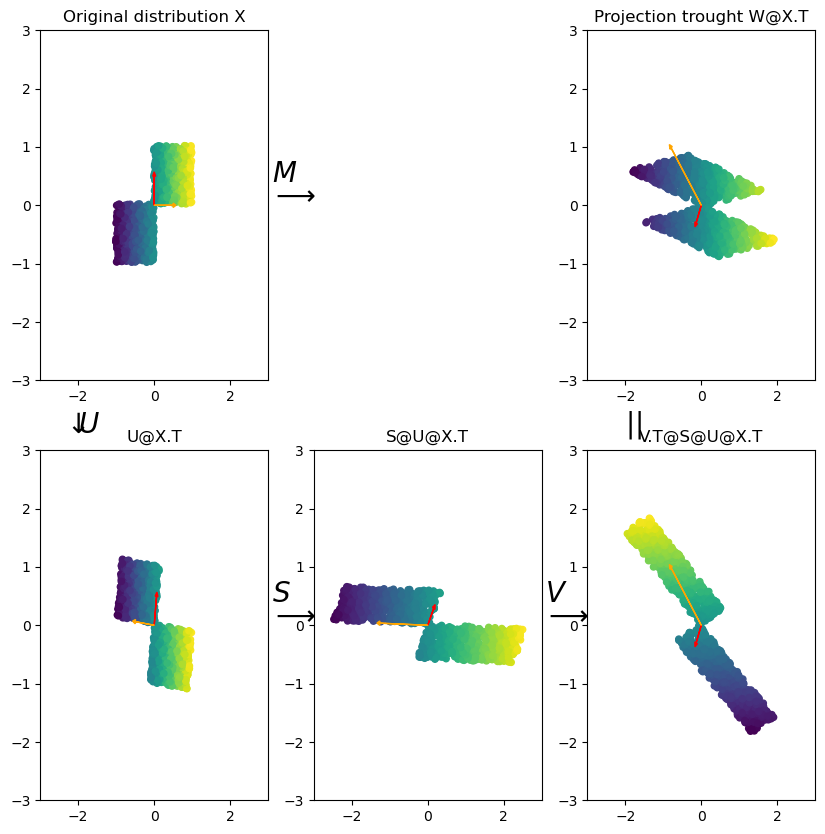

In [8]:
#@title Linear transformations Singular Value Decomposition
colorsX = X[:, 0]
sz = 20


Z = X@W.T
colorsZ = Z[:, 0]
LW = L@W
centerW = W@center



T = X@U.T
colorsT = T[:, 0]
LU = L@U
centerU = U@center


Y = T@S
colorsY = Y[:, 0]
LS = L@U@S
centerS = S@centerU

O = Y@V
colorsO = O[:, 0]
LV = LS@V
centerV = V@centerS



print(center[0])

fig, axs = plt.subplots(2, 3,  figsize=(10, 10))
axs[0, 0].set_xlim([-3, 3])
axs[0, 0].set_ylim([-3, 3])
axs[0, 0].scatter(X[:,0], X[:,1], sz,colorsX,cmap='viridis')
axs[0, 0].arrow(center[0], center[0],L[0][0],L[0][1] , head_width=0.15*lenght, head_length=0.15*lenght, color='red')
axs[0, 0].arrow(center[0], center[0], L[1][0], L[1][1], head_width=0.15*lenght, head_length=0.15*lenght, color='orange')
axs[0, 0].set_title('Original distribution X')
axs[0,0].text( 3.1,0.4, r'$M$', fontsize=20)
axs[0,0].text(2.8, 0, r' $\longrightarrow$', fontsize=20)
axs[0, 1].axis('off')
axs[0, 2].set_xlim([-3, 3])
axs[0, 2].set_ylim([-3, 3])
axs[0, 2].scatter(Z[:,0], Z[:,1], sz,colorsZ,cmap='viridis')
axs[0, 2].arrow(centerW[0], centerW[0],LW[0][0],LW[0][1] , head_width=0.15*lenght, head_length=0.15*lenght, color='red')
axs[0, 2].arrow(centerW[0], centerW[0], LW[1][0], LW[1][1], head_width=0.15*lenght, head_length=0.15*lenght, color='orange')
axs[0, 2].set_title('Projection trought W@X.T')
axs[1, 1].set_xlim([-3, 3])
axs[1, 1].set_ylim([-3, 3])
axs[1, 1].scatter(Y[:,0],Y[:,1] , sz,colorsY,cmap='viridis')
axs[1, 1].arrow(centerS[0], centerS[1],LS[0][0],LS[0][1] , head_width=0.15*lenght, head_length=0.15*lenght, color='red')
axs[1, 1].arrow(centerS[0], centerS[1], LS[1][0], LS[1][1], head_width=0.15*lenght, head_length=0.15*lenght, color='orange')
axs[1,1].text( 3.1,0.4, r'$V$', fontsize=20)
axs[1,1].text(2.8, 0, r' $\longrightarrow$', fontsize=20)
axs[1, 1].set_title('S@U@X.T')
axs[1, 0].scatter(T[:,0],T[:,1] , sz,colorsT,cmap='viridis')
axs[1, 0].arrow(centerU[0], centerU[1],LU[0][0],LU[0][1] , head_width=0.15*lenght, head_length=0.15*lenght, color='red')
axs[1, 0].arrow(centerU[0], centerU[1], LU[1][0], LU[1][1], head_width=0.15*lenght, head_length=0.15*lenght, color='orange')
axs[1, 0].set_title('U@X.T')
axs[1, 0].set_xlim([-3, 3])
axs[1, 0].set_ylim([-3, 3])
axs[1,0].text( 3.1,0.4, r'$S$', fontsize=20)
axs[1,0].text(2.8, 0, r' $\longrightarrow$', fontsize=20)
axs[1,0].text( -2,3.3, r'$U$', fontsize=20)
axs[1,0].text(-2.7, 3.3, r' $\downarrow$', fontsize=20)

axs[1, 2].scatter(O[:,1],O[:,0] , sz,colorsO,cmap='viridis')
axs[1, 2].arrow(centerV[0], centerV[1],LV[0][0],LV[0][1] , head_width=0.15*lenght, head_length=0.15*lenght, color='red')
axs[1, 2].arrow(centerV[0], centerV[1], LV[1][0], LV[1][1], head_width=0.15*lenght, head_length=0.15*lenght, color='orange')
axs[1, 2].set_title('V.T@S@U@X.T')
axs[1, 2].set_xlim([-3, 3])
axs[1, 2].set_ylim([-3, 3])
axs[1,2].text( -2,3.3, r'$||$', fontsize=20)


#axs[1, 1].scatter(O[:,0],O[:,1] , sz,colorsO,cmap='viridis')
#axs[1, 1].arrow(centerV[0], centerV[1],LV[0][0],LV[0][1] , head_width=0.15*lenght, head_length=0.15*lenght, color='red')
#axs[1, 1].arrow(centerV[0], centerV[1], LV[1][0], LV[1][1], head_width=0.15*lenght, head_length=0.15*lenght, color='orange')
#axs[1, 1].set_title('Reflection matrix')
#axs[1, 1].set_xlim(xlim)


### Non Linear transformations

Text(0.5, 1.0, 'Projection trought W@X.T')

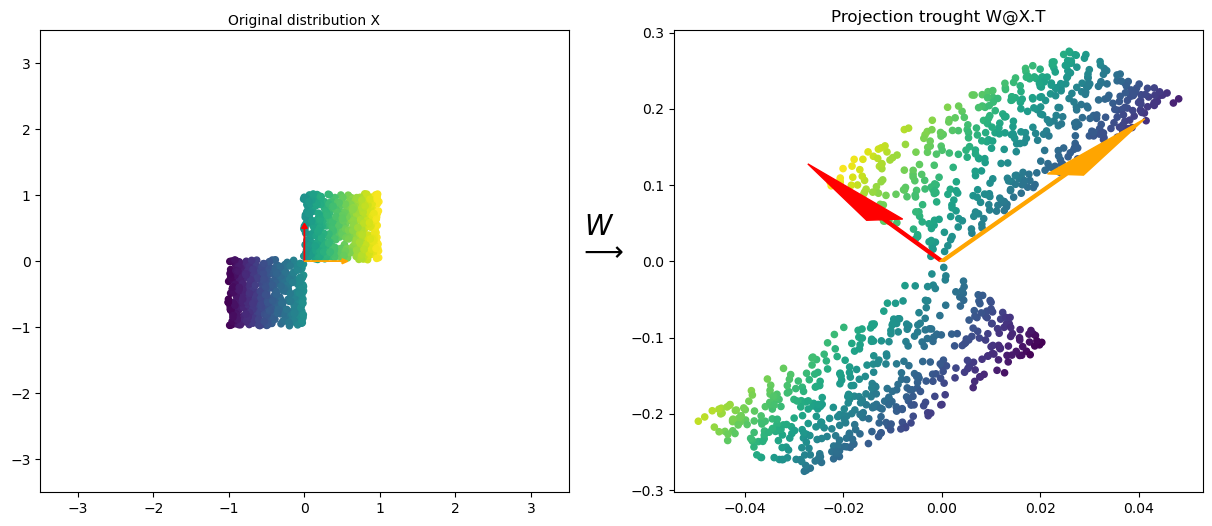

In [9]:
colorsX = X[:, 0]
sz = 20


model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh(),
        nn.Linear(2, 2, bias=False),
        nn.Tanh()
)

model.to(device)
with torch.no_grad():
    Y = model(X)
    center_model = model(center)
    L_model = model(L)
colorsY = Y[:, 0]
#L_model = model(L)tensor.detach().numpy()

fig, axs = plt.subplots(1 ,2,  figsize=(15,6))
axs[0].set_xlim([-3.5, 3.5])
axs[0].set_ylim([-3.5, 3.5])
axs[0].scatter(X[:,0], X[:,1], sz,colorsX,cmap='viridis')
axs[0].arrow(center[0], center[0],L[0][0],L[0][1] , head_width=0.15*lenght, head_length=0.15*lenght, color='red')
axs[0].arrow(center[0], center[0], L[1][0], L[1][1], head_width=0.15*lenght, head_length=0.15*lenght, color='orange')
axs[0].xaxis.set_label_position('top')
axs[0].set_xlabel('Original distribution X')
axs[0].text( 3.7,0.4, r'$W$', fontsize=20)
axs[0].text(3.5, 0, r' $\longrightarrow$', fontsize=20)
axs[ 1].scatter(Y[:,0], Y[:,1], sz,colorsZ,cmap='viridis')
axs[ 1].arrow(center_model[0], center_model[0],L_model[0][0],L_model[0][1] , head_width=0.015*lenght, head_length=0.15*lenght, color='red')
axs[ 1].arrow(center_model[0], center_model[0], L_model[1][0], L_model[1][1], head_width=0.015*lenght, head_length=0.15*lenght, color='orange')
axs[ 1].set_title('Projection trought W@X.T')

In [10]:
(X[:,1]>0).shape

torch.Size([1000])

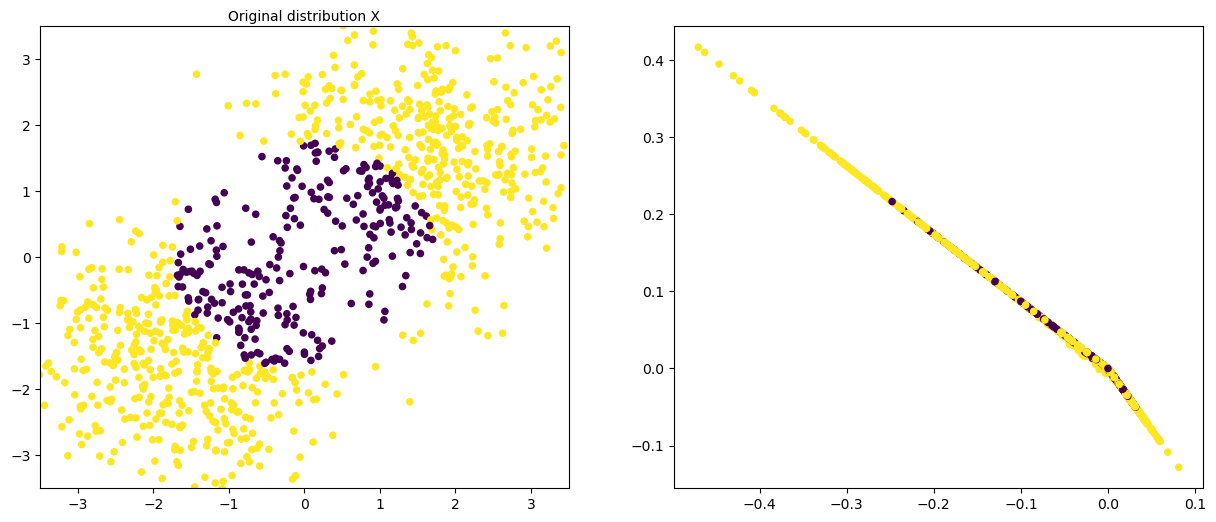

In [11]:
colorsX = X[:, 0]
sz = 20

X = torch.randn(int(n_points/2), 2).to(device)
Y = torch.randn(int(n_points/2), 2).to(device) + 3
X = torch.cat((X,Y), dim = 0)
X = X-torch.mean(X,0)

model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.ReLU(),
        nn.Linear(2, 2, bias=False),
        nn.Tanh()
)

model.to(device)
with torch.no_grad():
    Y = model(X)
    center_model = model(center)
colorsX = (X[:,1]**2+X[:,0]**2 >3)


ymin, ymax = min(min(X[:,0]),min(Y[:,0])), max(max(X[:,0]),max(Y[:,0]))
xmin, xmax = min(min(X[:,1]),min(Y[:,1])), max(max(X[:,1]),max(Y[:,1]))

fig, axs = plt.subplots(1 ,2,  figsize=(15,6))
axs[0].set_xlim([-3.5, 3.5])
axs[0].set_ylim([-3.5, 3.5])
axs[0].scatter(X[:,0], X[:,1], sz,colorsX,cmap='viridis')
axs[0].xaxis.set_label_position('top')
axs[0].set_xlabel('Original distribution X')
#axs[0].text( 3.7,0.4, r'$W$', fontsize=20)
#axs[0].text(3.5, 0, r' $\longrightarrow$', fontsize=20)
axs[ 1].scatter(Y[:,0], Y[:,1], sz,colorsX,cmap='viridis')
# for ax in axs:
#         ax.set_xlim(xmin, xmax)
#         ax.set_ylim(ymin, ymax)
#axs[ 1].set_title('Projection trought W@X.T')